# Latar Belakang

Dataset Airline Passenger Satisfation berisi hasil survei berkaitan dengan kepuasan penumpang airline, dimana banyak faktor yang disurvei untuk mengukur kepuasan penumpang secara keseluruhan.

Sebuah perusahaan yang bergerak di bidang penerbangan (airline) melakukan survei berkaitan dengan kepuasan penumpang. Dalam survei tersebut banyak faktor yang ditanyakan kepada penumpang untuk dinilai dan nantinya dapat mengukur kepuasan penumpang secara keseluruhan.

# Pernyataan Masalah (Business Problem)

Untuk mengetahui kondisi dan meningkatkan kualitas maskapai, perusahaan ingin mengetahui beberapa business problem berikut.

Perusahaan (Airline) ingin mengetahui: 
1. **Bagaimana kondisi kepuasan pelanggan?** Untuk mengetahui kondisi persebaran kepuasan pelanggan baik yang satisfied maupun yang non satisfied.
1. **Faktor apa yang paling berpengaruh terhadap kepuasan dan ketidakpuasan penumpang secara keseluruhan?** Agar perusahaan dapat melakukan evaluasi terhadap faktor tersebut sehingga tingkat kepuasan penumpang dapat meningkat. 
1. **Kelas penumpang apa yang paling banyak merasa tidak puas (selain satisfied)?** Hal ini bisa membantu perusahaan untuk menentukan kepada siapa strategi yang tepat perlu diterapkan agar dapat menaikan kepuasan penumpang secara keseluruhan.
1. **Bagaimana hubungan tipe penumpang dengan tingkat kepuasan penumpang?** Hal ini bisa membantu perusahaan untuk menentukan kepada siapa strategi yang tepat perlu diterapkan agar dapat menaikan kepuasan penumpang.
1. **Bagaimana hubungan keterlambatan pesawat dengan tingkat kepuasan penumpang?** Perusahaan ingin mengetahui bagaimana pengaruh keterlambatan pesawat dengan tingkat kepuasan penumpang.



# Dataset

Untuk menjawab pertanyaan tersebut, kita perlu melakukan analisa terhadap data dari hasil survei kepuasan penumpang airline tersebut. Dataset bisa diakses pada link berikut. 
<br>
https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [ ]:
# Import Library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import normaltest, chi2_contingency

from warnings import filterwarnings
import pylab as py

In [ ]:
df = pd.read_csv('airline passanger satisfaction.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Dataset ini sebenarnya berisi 103904 baris dan 24 kolom, kolom 'Unnamed: 0' sebenarnya adalah index dari data dan terduplikasi oleh index yang dibuat dari dataFrame sehingga berikutnya kolom 'Unnamed: 0' akan didrop. Hal ini disebabkan karena kolom index tidak diberi nama/judul/header.

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
pd.set_option('display.max_columns', None) #Untuk menampilkan keseluruhan nama kolom
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Data Understanding

Dataset ini berisi informasi terkait identitas unik penumpang (id), demografis/morfologi penumpang (Gender, Customer Type, Age, Type of Travel, Class, Flight Distance), tingkat kepuasan penumpang pada beberapa faktor (Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness) dan waktu delay (Departure Delay in Minutes, Arrival Delay in Minutes) serta kepuasan penumpang secara keseluruhan (satisfaction)

Terdapat 24 kolom di dalam dataset 'airline passenger satisfaction', yaitu:
1. id : ID unik untuk tiap penumpang

    Demografi/Morfologi :
1. Gender : jenis kelamin penumpang (Male, Female)
1. Customer Type : tipe pelanggan (Loyal, disloyal)
1. Age : usia penumpang
1. Type of Travel : tipe perjalanan (Personal Travel, Business travel)
1. Class : kelas penerbangan (Eco, Eco plus, Business)
1. Flight Distance : jarak penerbangan

    Faktor tingkat kepuasan. Keterangan = Skala 0 : not applicable, bisa jadi penumpang tidak mengisi bagian ini/tidak terdapat data pada bagian ini. Skala 1 (tidak puas) - 5 (sangat puas)
1. Inflight wifi service : kepuasan terhadap layanan wifi selama penerbangan 
1. Departure/Arrival time convenient : kepuasan terhadap waktu kedatangan/keberangkatan 
1. Ease of Online booking : kemudahan pemesanan online 
1. Gate location : kepuasan terhadap lokasi gate pesawat
1. Food and drink : kepuasan terhadap makanan dan minuman 
1. Online boarding : kepuasan terhadap online boarding
1. Seat comfort : kepuasan terhadap kenyamanan tempat duduk
1. Inflight entertainment : kepuasan terhadap hiburan selama penerbangan
1. On-board service : kepuasan terhadap on-board service
1. Leg room service : kepuasan terhadap leg room service
1. Baggage handling : kepuasan terhadap penanganan bagasi
1. Checkin service : kepuasan terhadap checkin service
1. Inflight service : kepuasan terhadap pelayanan selama penerbangan
1. Cleanliness : kepuasan terhadap kebersihan

    Waktu Delay :
1. Departure Delay in Minutes : waktu delay keberangkatan dalam satuan menit. Semakin besar angka berarti semakin lama waktu delay
1. Arrival Delay in Minutes : waktu delay kedatangan dalam satuan menit. Semakin besar angka berarti semakin lama waktu delay

    Kepuasan secara keseluruhan :
1. satisfaction : kepuasan penumpang secara keseluruhan ada 2, yaitu: 1. satisfied, 2. neutral or dissatisfied. Dimana penilaian positif bagi airline didapatkan saat satisfaction bernilai satisfied. 

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

df.info(verbose= True, show_counts=True)

Jumlah baris dan kolom di dataset df adalah (103904, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-n

**Data type dari masing masing kolom sudah sesuai sehingga tidak perlu mengubah type data.**

## Cek apakah kolom `id` ada yang duplikat atau tidak

In [ ]:
df['id'].duplicated().sum() # Cek kolom id apakah ada yang duplikat atau tidak

0

Karena hasil sum .duplicated() kolom `id` adalah 0 berarti tidak ada id yang duplikat, sehingga 103904 data id unik. Jika ada data id yang duplikat maka sebaiknya didrop salah satu id tersebut agar perhitungan bisa lebih valid.

## Cek jumlah data kosong pada kolom `Arrival Delay in Minutes`

In [ ]:
df['Arrival Delay in Minutes'].isna().sum()

310

In [ ]:
df[df['Arrival Delay in Minutes'].isna() == True]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,36729,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,2,3,3,3,4,5,4,3,4,3,230,NaN,neutral or dissatisfied
102384,71241,Male,Loyal Customer,58,Business travel,Eco,733,3,3,3,3,3,3,3,3,3,1,2,4,2,3,55,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,1,5,1,3,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied
102960,36787,Male,Loyal Customer,58,Business travel,Eco,1088,4,4,1,1,5,4,5,5,1,5,5,5,3,5,0,NaN,satisfied


Jumlah data kosong pada kolom `Arrival Delay in Minutes` adalah 310 data. Pada kolom `Departure Delay in Minutes` dan `Arrival Delay in Minutes` terdapat nilai yang valuenya 0 dimana berarti tidak terjadi delay, sedangkan 310 data pada kolom `Arrival Delay in Minutes` tidak diisi (tidak terdapat data).

## Cek overview statistik deskriptif dari keseluruhan kolom.

 Pembahasan tiap kolom akan dijelaskan setelahnya

In [ ]:
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [ ]:
pd.set_option('display.max_colwidth', 1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


Secara umum, kita bisa melihat bahwa:
* dataset airline passenger satisfaction memiliki 24 kolom dan 103904 baris
* kolom `Arrival Delay in Minutes` memiliki data kosong sebanyak 310 data. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `id` berisikan id unik untuk tiap penumpang, maka kolom ini kurang relevan dalam analisis dan bisa dihapus. Setelah dicek tidak ada data yang duplikat pada kolom ini sehingga tidak ada data terduplikasi untuk analisis.
* Bagian tingkat kepuasan penumpang pada beberapa faktor (`Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness`) terdapat angka 0 (bisa dikatakan tidak mengisi survei) dimana seharusnya jika penumpang mengisi survei rentang yang diberikan adalah 1 (sangat tidak puas) - 5 (sangat puas). Sehingga angka 0 ini bisa disebut not applicable, kecuali kolom `Baggage handling` yang tidak terdapat value = 0. Sehingga perlu dilihat pengaruhnya pada masing masing faktor tersebut.

# Data Cleaning and Preprocessing

## Missing Value dan Data yang kurang sesuai (0 pada skala 1-5)

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [ ]:
kolom = ['id', 'Gender','Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 
          'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 
          'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes','Arrival Delay in Minutes', 'satisfaction']
list_null_total = []

for i in kolom:
    count_null_total = len(df[df[i]==0]) # Menghitung jumlah data yang bernilai 0
    list_null_total.append(count_null_total) # Menghitung persentase data yang bernilai 0 dalam keseluruhan data pada satu kolom


In [ ]:
df_countNull = pd.DataFrame(
    {
        'kolom' : kolom,
        'count 0' : list_null_total,
    }
)

df_countNull

,kolom,count 0
0,id,0
1,Gender,0
2,Customer Type,0
3,Age,0
4,Type of Travel,0
5,Class,0
6,Flight Distance,0
7,Inflight wifi service,3103
8,Departure/Arrival time convenient,5300
9,Ease of Online booking,4487


Untuk kolom `id, Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Baggage handling, Departure Delay in Minutes, satisfaction` (10 kolom) dipastikan tidak terdapat missing value. 
Note: untuk kolom `Departure Delay in Minutes` dan `Arrival Delay in Minutes` terdapat value 0 yang berarti tidak terjadi delay

Dapat dilihat pada pada dataset tersebut, jika menggunakan method isna().sum() untuk menghitung persentase missing value, dapat dilihat yang terdeteksi terdapat missing adalah kolom `Arrival Delay in Minutes`(1 kolom) sebanyak 310 data atau setara dengan 0.298352 %.

Untuk bagian faktor kepuasan penumpang kolom `Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Checkin service, Inflight service, Cleanliness` (13 kolom) tidak ada missing value (Null Value) namun perlu dicek seberapa banyak nilai 0 pada masing-masing kolom karena akan berpengaruh terhadap perhitungan mean kepuasan dari tiap kolom.

### Missing Value kolom `Arrival Delay in Minutes`

In [ ]:
df[['Arrival Delay in Minutes']]

,Arrival Delay in Minutes
0,18.0
1,6.0
2,0.0
3,9.0
4,0.0
...,...
103899,0.0
103900,0.0
103901,14.0
103902,0.0


In [ ]:
Arrival = df[['Arrival Delay in Minutes']].dropna() 
Arrival

,Arrival Delay in Minutes
0,18.0
1,6.0
2,0.0
3,9.0
4,0.0
...,...
103899,0.0
103900,0.0
103901,14.0
103902,0.0


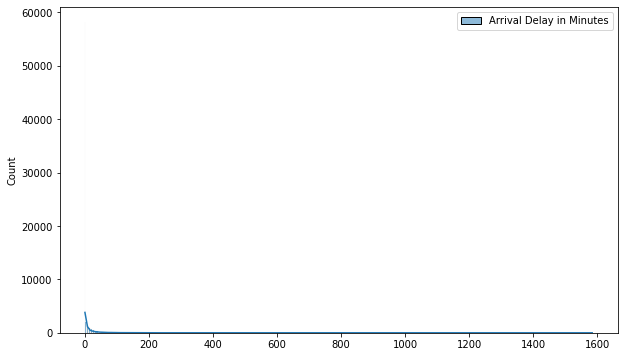

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(Arrival, kde = True)
plt.show()

In [ ]:
Arrival_nonull = Arrival.drop(Arrival[Arrival['Arrival Delay in Minutes'] == 0].index)
Arrival_nonull

,Arrival Delay in Minutes
0,18.0
1,6.0
3,9.0
6,23.0
12,8.0
...,...
103893,29.0
103894,26.0
103895,10.0
103897,7.0


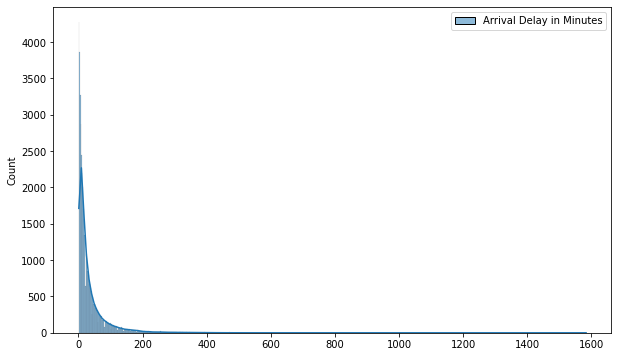

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(Arrival_nonull, kde = True)
plt.show()

#### Cek Normalitas

Kosmolgorov-Smirnov

In [ ]:
# from scipy.stats import kstest
# ks_statistic, ks_pvalue = kstest(df['Arrival Delay in Minutes'], 'norm')

# if ks_pvalue > 0.05 :
#     print (f'P-Value: {ks_pvalue}. So, we assume a normal distribution')
# else:
#     print (f'P-Value: {ks_pvalue}. So, we not assume a normal distribution')

P-Value: nan. So, we not assume a normal distribution


In [ ]:
from scipy.stats import kstest
ks_statistic, ks_pvalue = kstest(Arrival['Arrival Delay in Minutes'], 'norm')

if ks_pvalue > 0.05 :
    print (f'P-Value: {ks_pvalue}. So, we assume a normal distribution')
else:
    print (f'P-Value: {ks_pvalue}. So, we not assume a normal distribution')

P-Value: 0.0. So, we not assume a normal distribution


Lilliefors

In [ ]:
# from scipy.stats import kstest
# ks_statistic, ks_pvalue = kstest(df['Arrival Delay in Minutes'], 'norm')

# if ks_pvalue > 0.05 :
#     print (f'P-Value: {ks_pvalue}. So, we assume a normal distribution')
# else:
#     print (f'P-Value: {ks_pvalue}. So, we not assume a normal distribution')

P-Value: nan. So, we not assume a normal distribution


In [ ]:
from statsmodels.stats.diagnostic import lilliefors
lf_statistic, lf_pvalue = lilliefors(Arrival['Arrival Delay in Minutes'])

if lf_pvalue > 0.05 :
    print (f'P-Value: {lf_pvalue}. So, we assume a normal distribution')
else:
    print (f'P-Value: {lf_pvalue}. So, we not assume a normal distribution')

P-Value: 0.0009999999999998899. So, we not assume a normal distribution


ShapiroWilk

In [ ]:
# from scipy.stats import shapiro
# sw_statistic, sw_pvalue = shapiro(df['Arrival Delay in Minutes'])

# if sw_pvalue > 0.05 :
#     print (f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
# else:
#     print (f'P-Value: {sw_pvalue}. So, we not assume a normal distribution')

P-Value: 1.0. So, we assume a normal distribution


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import shapiro
sw_statistic, sw_pvalue = shapiro(Arrival['Arrival Delay in Minutes'])

if sw_pvalue > 0.05 :
    print (f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else:
    print (f'P-Value: {sw_pvalue}. So, we not assume a normal distribution')

P-Value: 0.0. So, we not assume a normal distribution


/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


D'Agostino Pearson

In [ ]:
# from scipy.stats import normaltest

# dp_statistic, dp_pvalue = normaltest(df['Arrival Delay in Minutes'])

# if dp_pvalue > 0.05 :
#     print (f'P-Value: {dp_pvalue}. So, we assume a normal distribution')
# else:
#     print (f'P-Value: {dp_pvalue}. So, we not assume a normal distribution')

P-Value: nan. So, we not assume a normal distribution


In [ ]:
from scipy.stats import normaltest

dp_statistic, dp_pvalue = normaltest(Arrival['Arrival Delay in Minutes'])

if dp_pvalue > 0.05 :
    print (f'P-Value: {dp_pvalue}. So, we assume a normal distribution')
else:
    print (f'P-Value: {dp_pvalue}. So, we not assume a normal distribution')

P-Value: 0.0. So, we not assume a normal distribution


Dari cek distribusi visual data dan keempat uji normalitas didapatkan bahwa **distribusi data tidak normal**. Dimana pengujian harus menghilangkan data null value terlebih dahulu untuk menghasilkan pengujian yang sesuai.

In [ ]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean     15.178678    
std      38.698682    
min      0.000000     
25%      0.000000     
50%      0.000000     
75%      13.000000    
max      1584.000000  
Name: Arrival Delay in Minutes, dtype: float64

Berdasarkan uji normalitas yang dilakukan, baik menggunakan visual dan perhitungan, menunjukkan bahwa data kolom `Arrival Delay in Minutes` tidak terdistribusi normal sehingga akan dicoba pengisian null value akan menggunakan pendekatan **median**. Namun dalam kolom `Arrival Delay in Minutes` median bernilai 0 sehingga bisa dikatakan pengisian akan dilakukan dengan mengisi value dengan kondisi tidak terjadi delay. Oleh karena itu, selanjutnya akan dicoba cek keterkaitan antara kolom `Arrival Delay in Minutes` dan `Departure Delay in Minutes` (tidak memiliki null value) dalam menganalisis keterlambatan (delay). Hal yang mungkin terjadi adalah saat terjadi keterlambatan pada keberangkatan, maka akan terjadi keterlambatan juga pada kedatangan

Kemudian akan dilakukan pengecekan korelasi antara kolom `Arrival Delay in Minutes` dan `Departure Delay in Minutes` untuk mengetahui keterkaitan dua kolom tersebut

In [ ]:
# Karena distribusi tidak normal, sehingga dilakukan analisa korelasi dengan metode Spearman
df[['Arrival Delay in Minutes','Departure Delay in Minutes']].corr('spearman')

,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.740843
Departure Delay in Minutes,0.740843,1.000000


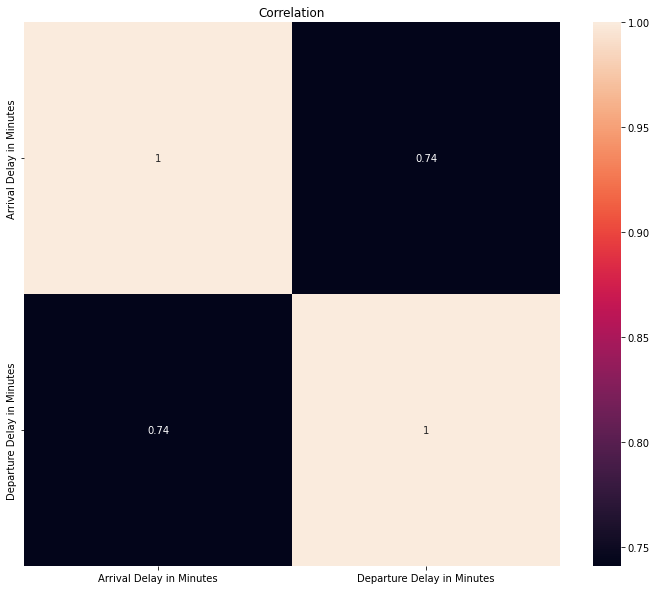

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df[['Arrival Delay in Minutes','Departure Delay in Minutes']].corr('spearman'), annot=True)
plt.title('Correlation')
plt.show()

Dari perhitungan korelasi tersebut menunjukkan bahwa kolom `Arrival Delay in Minutes` dan `Departure Delay in Minutes` memiliki korelasi yang relatif kuat sehingga kedua kolom tersebut memiliki keterkaitan yang kuat, lalu untuk melakukan analisis keterlambatan selanjutnya (menjawab salah satu business question) akan menggunakan tambahan kolom `Departure Delay in Minutes`(tanpa berisi data null value) serta tidak menghilangkan kolom `Departure Delay in Minutes`

### Faktor kepuasan pelanggan

Value 0 akan menjadi concern karena pada salah satu business question, ingin mengetahui faktor apa yang paling berpengaruh terhadap kepuasan penumpang. Sehingga value 0 pada kolom faktor kepuasan pelanggan perlu dihilangkan karena 0 tidak applicable jika kita memiliki ide untuk menghitung mean (rata-rata) dari tiap faktor kepuasan pelanggan. Dengan adanya nilai 0 bisa menimbulkan kekeliruan pada perhitungan mean pada masing masing kolom.

Kita akan fokus ke bagian faktor kepuasan penumpang kolom `Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness` (14 kolom)

In [ ]:
satisfaction_factor = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
            'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling','Checkin service', 'Inflight service', 'Cleanliness']
list_null = []
list_persen = []

for i in satisfaction_factor:
    count_null = len(df[df[i]==0]) # Menghitung jumlah data yang bernilai 0
    persen_null = count_null/len(df[i])*100 # Menghitung persentase data yang bernilai 0 dalam keseluruhan data pada satu kolom
    list_null.append(count_null) # Memasukkan jumlah data yang bernilai 0 ke dalam list_null
    list_persen.append(persen_null) # Memasukkan persentase data yang bernilai 0 ke dalam list_persen

In [ ]:
df_countNull = pd.DataFrame(
    {
        'kolom' : satisfaction_factor,
        'count 0' : list_null,
        'persen data 0 (%)' : list_persen
    }
)

df_countNull

,kolom,count 0,persen data 0 (%)
0,Inflight wifi service,3103,2.986411
1,Departure/Arrival time convenient,5300,5.100862
2,Ease of Online booking,4487,4.318409
3,Gate location,1,0.000962
4,Food and drink,107,0.102980
5,Online boarding,2428,2.336772
6,Seat comfort,1,0.000962
7,Inflight entertainment,14,0.013474
8,On-board service,3,0.002887
9,Leg room service,472,0.454265


Kita tidak menggunakan value 0 untuk menghitung nilai average satisfation dari masing masing kolom. Kita ingin menghitung nilai average satisfaction sebagai parameter apakah faktor tersebut sudah dianggap puas oleh penumpang (nilai average terendah dari banyak faktor tersebut menandakan faktor tersebut perlu ditingkatkan kualitas pelayanannya)

In [ ]:
list_average = []
list_average_noNull = []
list_noNull = []

for i in satisfaction_factor:
    factor_avg = df[i].mean()
    factor_avg_noNull = df[i].drop(df[df[i] == 0].index).mean()
    count_noNull = df[i].drop(df[df[i] == 0].index).count()
    list_average.append(factor_avg)
    list_average_noNull.append(factor_avg_noNull)
    list_noNull.append(count_noNull)

In [ ]:
df_factor_mean = pd.DataFrame(
    {
        'kolom' : satisfaction_factor,
        'Mean Satisfaction Tanpa 0' : list_average_noNull,
    }
)
df_factor_mean.sort_values(['Mean Satisfaction Tanpa 0'], ascending=True, ignore_index=True)

,kolom,Mean Satisfaction Tanpa 0
0,Inflight wifi service,2.813712
1,Ease of Online booking,2.881328
2,Gate location,2.976911
3,Food and drink,3.205430
4,Departure/Arrival time convenient,3.224788
5,Cleanliness,3.286730
6,Checkin service,3.304322
7,Online boarding,3.328147
8,Inflight entertainment,3.358610
9,Leg room service,3.366347


Dari hasil perhitungan rata-rata didapatkan
Top 3 terendah adalah faktor `Infligt wifi service , Ease of Online booking, Gate location`
Top 3 terbaik adalah faktor `Inflight service, Baggage handling, Seat comfort`. Untuk visualisasi akan ditampilkan pada bagian Data Analysis


In [ ]:
df_null_mean = pd.DataFrame(
    {
        'kolom' : satisfaction_factor,
        'Mean Satisfaction Dengan 0' : list_average
    }
)
df_null_mean.sort_values(['Mean Satisfaction Dengan 0'], ascending=True, ignore_index=True)

,kolom,Mean Satisfaction Dengan 0
0,Inflight wifi service,2.729683
1,Ease of Online booking,2.756901
2,Gate location,2.976883
3,Departure/Arrival time convenient,3.060296
4,Food and drink,3.202129
5,Online boarding,3.250375
6,Cleanliness,3.286351
7,Checkin service,3.304290
8,Leg room service,3.351055
9,Inflight entertainment,3.358158


Jika kita melakukan perhitungan dengan menyertakan value 0 ke dalam perhitungan didapatkan hasil yang kebetulan sama. Yaitu Top 3 terendah adalah faktor `Infligt wifi service , Ease of Online booking, Gate location`
Top 3 terbaik adalah faktor `Inflight service, Baggage handling, Seat comfort`.
Namun sebenarnya secara urutan dan nilai mean keseluruhan berbeda

In [ ]:
# Export data to excel untuk Tableau
df.to_excel("airline passanger satisfaction.xlsx")
          #  sheet_name='Sheet_name_1')  

# Data Analysis, Visualization and Recommendation

## 1. **Bagaimana kondisi kepuasan pelanggan ?** 


Untuk mengetahui kondisi dan persebaran kepuasan pelanggan baik yang satisfied maupun yang non satisfied.

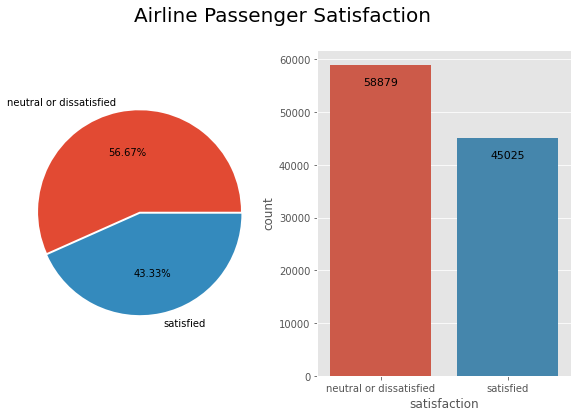

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6)).suptitle('Airline Passenger Satisfaction', fontsize=20)

plt.subplot(1,2,1)
plt.pie(df['satisfaction'].value_counts(), labels=['neutral or dissatisfied','satisfied'],autopct='%.2f%%',explode=(0.01,0.01))

plt.subplot(1,2,2)
ax=sns.countplot(x=df['satisfaction'], data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=11)

plt.show()  

Secara general berdasarkan grafik didapatkan informasi sebanyak 58.879 dari 103.904 penumpang (setara dengan 56,67%) merasa netral atau tidak puas terhadap pelayanan yang diberikan oleh maskapai penerbangan. Maka dapat dikatakan lebih banyak penumpang yang merasa netral atau tidak puas terhadap pelayanan dibandingkan yang merasa puas, sehingga maskapai perlu meningkatkan kualitas pelayanan yang diberikan agar tingkat kepuasan penumpang meningkat. Untuk melakukan hal tersebut, maskapai perlu mengetahui faktor apa saja yang mempengaruhi kepuasan penumpang supaya bisa efektif dan efisien dalam melakukan peningkatan kualitas.

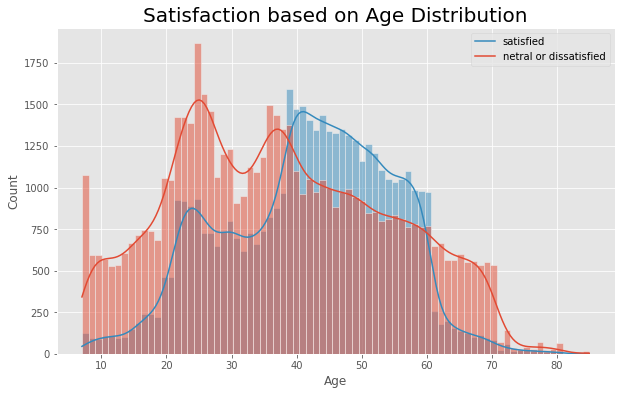

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['Age'], hue=df['satisfaction'], kde=True)
plt.legend(labels=['satisfied','netral or dissatisfied'])
plt.title('Satisfaction based on Age Distribution', fontsize=20)
plt.show()

Jika kita meminjau pada rentang umur 20-60 tahun (dominan pada distribusi), penumpang yang merasa netral or disatisfied memiliki kecenderungan lebih banyak pada rentang umur sekitar 20-40 tahun, sedangkan penumpang yang merasa puas terhadap pelayanan yang diberikan memiliki kecenderungan lebih banyak berada pada rentang umur 40-60 tahun. ***Segmentasi umur tersebut akan memberikan tanda bahwa maskapai perlu melakukan pendekatan atau perbaikan layanan yang lebih cocok untuk rentang umur 20-40 tahun***. Dimana selanjutnya akan dilihat faktor apa saja yang sebenernya sangat berpengaruh terhadap kepuasan penumpang secara keseluruhan 

## 2. **Faktor apa yang paling berpengaruh terhadap kepuasan dan ketidakpuasan penumpang secara keseluruhan?**


Agar perusahaan dapat melakukan evaluasi terhadap faktor tersebut sehingga tingkat kepuasan penumpang dapat meningkat. Perhitungan kepuasan pelanggan sebelumnya sudah dilakukan sehingga kita akan merecall data tersebut

In [ ]:
df_factor_sorted = df_factor_mean.sort_values(['Mean Satisfaction Tanpa 0'], ascending=True, ignore_index=True)
df_factor_sorted 

,kolom,Mean Satisfaction Tanpa 0
0,Inflight wifi service,2.813712
1,Ease of Online booking,2.881328
2,Gate location,2.976911
3,Food and drink,3.205430
4,Departure/Arrival time convenient,3.224788
5,Cleanliness,3.286730
6,Checkin service,3.304322
7,Online boarding,3.328147
8,Inflight entertainment,3.358610
9,Leg room service,3.366347


In [ ]:
# Export data to Tableau
df_factor_sorted.to_excel("airline passanger satisfaction_mean factor.xlsx")

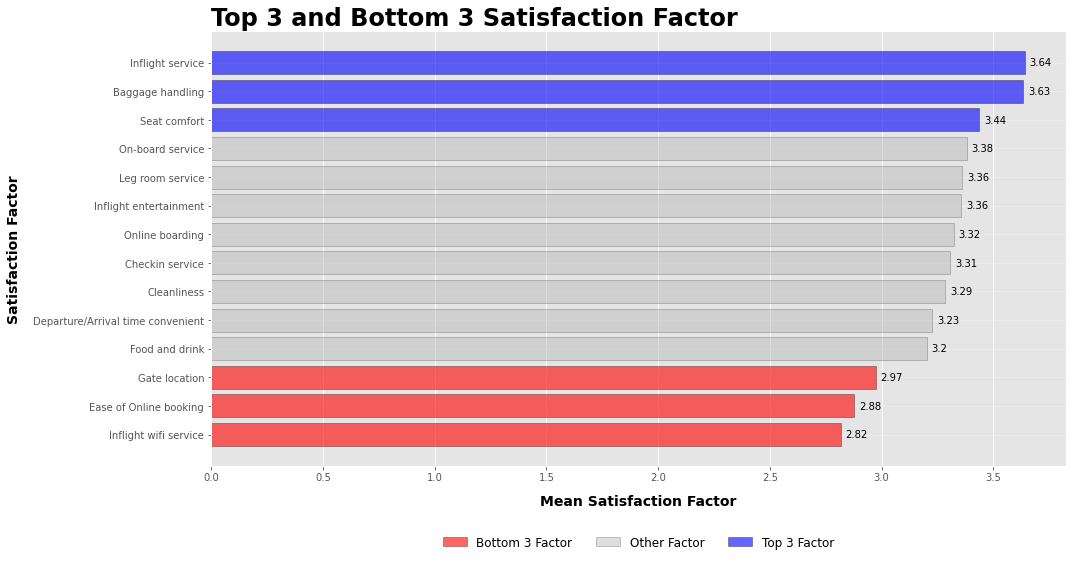

In [ ]:
bot_factor = df_factor_sorted.iloc[0:3]
top_factor = df_factor_sorted.iloc[-3::]
other_factor = df_factor_sorted.iloc[3:-3]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 8))
bars_bot_factor = ax.barh(bot_factor['kolom'], bot_factor['Mean Satisfaction Tanpa 0'], color='red', alpha=0.6, edgecolor='black')
bars_other_factor = ax.barh(other_factor['kolom'], other_factor['Mean Satisfaction Tanpa 0'], color='#AEAEAE', alpha=0.4, edgecolor='black')
bars_top_factor = ax.barh(top_factor['kolom'], top_factor['Mean Satisfaction Tanpa 0'], color='blue', alpha=0.6, edgecolor='black')

ax.legend(['Bottom 3 Factor','Other Factor','Top 3 Factor'],
          loc='upper center',
          bbox_to_anchor=(0.5, -0.12),
          ncol=4,
          borderpad=1,
          frameon=False,
          fontsize=12
         )


xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel('Mean Satisfaction Factor', fontsize=14, labelpad=12, fontweight='bold', color='black')
ax.set_ylabel('Satisfaction Factor', fontsize=14, labelpad=12, fontweight='bold', color='black')

for i, v in enumerate(df_factor_sorted['Mean Satisfaction Tanpa 0']):
    ax.text(v + 0.02, i, round(v, 2), va='center', color='black')

plt.title("Top 3 and Bottom 3 Satisfaction Factor", loc='left', fontsize=24, fontweight='bold', color='black')  
plt.tight_layout()
plt.show()

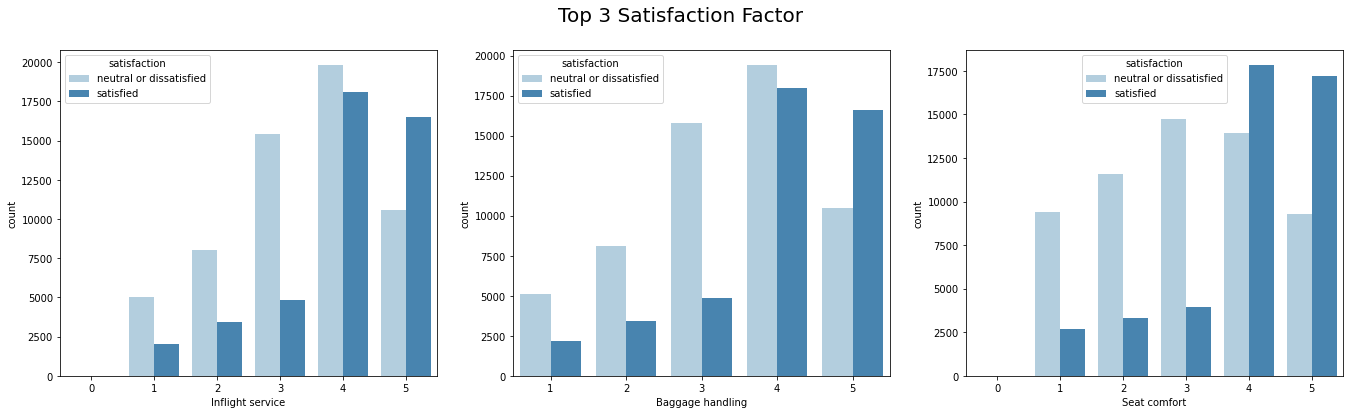

In [ ]:
# Top 3 Factor
plt.figure(figsize=(23,6)).suptitle('Top 3 Satisfaction Factor', fontsize=20)

plt.subplot(1,3,1)
sns.countplot(data=df,x='Inflight service',hue='satisfaction', palette='Blues')

plt.subplot(1,3,2)
sns.countplot(data=df,x='Baggage handling',hue='satisfaction', palette='Blues')

plt.subplot(1,3,3)
sns.countplot(data=df,x='Seat comfort',hue='satisfaction', palette='Blues')

plt.show()

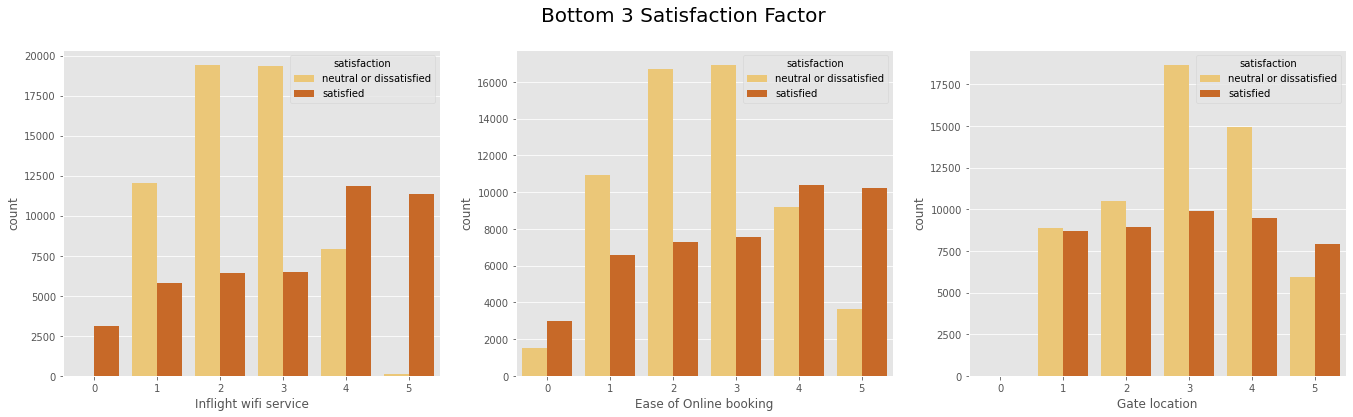

In [ ]:
# Bottom 3 Factor
plt.figure(figsize=(23,6)).suptitle('Bottom 3 Satisfaction Factor', fontsize=20)

plt.subplot(1,3,1)
sns.countplot(data=df,x='Inflight wifi service',hue='satisfaction', palette='YlOrBr')

plt.subplot(1,3,2)
sns.countplot(data=df,x='Ease of Online booking',hue='satisfaction', palette='YlOrBr')

plt.subplot(1,3,3)
sns.countplot(data=df,x='Gate location',hue='satisfaction', palette='YlOrBr')

plt.show()

Dari 14 faktor yang berpengaruh terhadap kepuasan yang disurvei oleh maskapai, terdapat 3 faktor dengan penilaian pelayanan terbaik (secara berurutan dari yang terbaik), yaitu Inflight service, Baggage Handling, dan Seat comfort. Selanjutnya terdapat 3 faktor dengan penilaian pelayanan terburuk (secara berurutan dari yang terburuk), yaitu Inflight wifi service, Ease of Online booking, Gate location. Maskapai perlu lebih memerhatikan 3 faktor dengan penilaian pelayan terburuk untuk bisa diperbaiki pelayanannya guna meningkatkan kepuasan penumpang. 

Untuk top 3 factor banyak diisi oleh penumpang dengan skala 4 sedangkan bottom 3 factor banyak diisi oleh skala 3

Rekomendasi: 

- Inflight wifi service : faktor ini dapat diperbaiki dengan meningkatkan kualitas wifi yang disediakan oleh maskapai, hal ini dirasa cukup penting karena penggunaan wifi memiliki demand yang tinggi saat travel khususnya di pesawat karena tidak bisa menggunakan mobile data.

- Ease of Online booking : faktor ini dapat diperbaiki dengan membuat aplikasi dengan fitur yang lebih mengikuti jaman atau up-to-date. Atau jika memang sudah ada aplikasi online booking maka perlu dikembangkan aplikasinya sehingga lebih mudah dimengerti dan memudahkan penumpang dalam online booking maupun online boarding (lebih user friendly).

- Gate location : faktor lokasi gate dapat diadjust agar tidak terlalu jauh dari pesawat sehingga tidak memerlukan waktu dan tenaga yang lebih banyak untuk mobilisasi dari gate ke pesawat. Menambahkan fasilitas shuttle bus untuk lokasi gate dan pesawat yang jauh juga dapat menjadi opsi.

Note : Dalam kondisi real, untuk menentukan faktor mana yang sebaiknya ditingkatkan juga bergantung oleh cost yang dibutuhkan, misal saat menyediakan shuttle bus mungkin membutuhkan cost yang lebih banyak dibandingkan meningkatkan kualitas wifi saat penerbangan. Hal tersebut yang perlu menjadi pertimbangan maskapai untuk menentukan faktor mana yang perlu diprioritaskan dan memberikan dampak peningkatan yang signifikan.

## 3. **Kelas penumpang apa yang paling banyak merasa tidak puas (selain satisfied)?**

Hal ini bisa membantu perusahaan untuk menentukan kepada siapa strategi yang tepat perlu diterapkan agar dapat menaikan kepuasan penumpang secara keseluruhan.


In [ ]:
# Persebaran kepuasan penumpang berdasarkan kelas penumpang
df.pivot_table(values='Class', index=df['Class'], columns='satisfaction', aggfunc='count')

# pd.crosstab(df['Class'], df['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,15185,34480
Eco,38044,8701
Eco Plus,5650,1844


In [ ]:
# Persebaran kepuasan penumpang berdasarkan kelas penumpang dalam persentase
pd.crosstab(df['Class'], df['satisfaction'], normalize='index').round(2)*100

satisfaction,neutral or dissatisfied,satisfied
Class,,
Business,31.0,69.0
Eco,81.0,19.0
Eco Plus,75.0,25.0


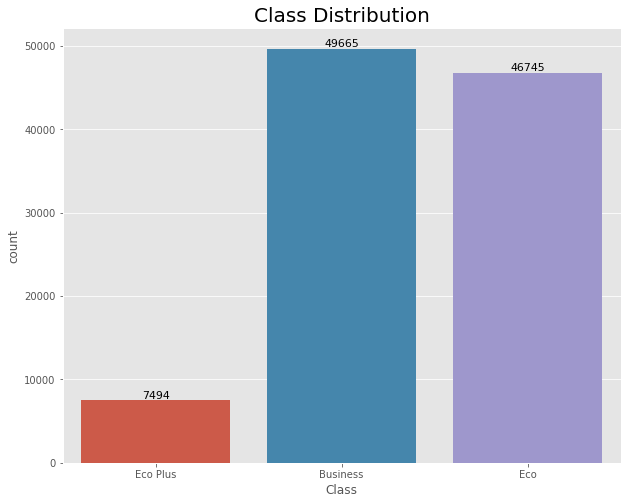

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x='Class')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=11)
plt.title('Class Distribution', fontsize=20)
plt.show()

In [ ]:
#Plotly Express, output mungkin tidak dapat dilihat di Github
fig = px.sunburst(df,
                  path=['satisfaction','Class'],
                  color='satisfaction',
                  title='Satisfaction Based on Class')

fig.show()

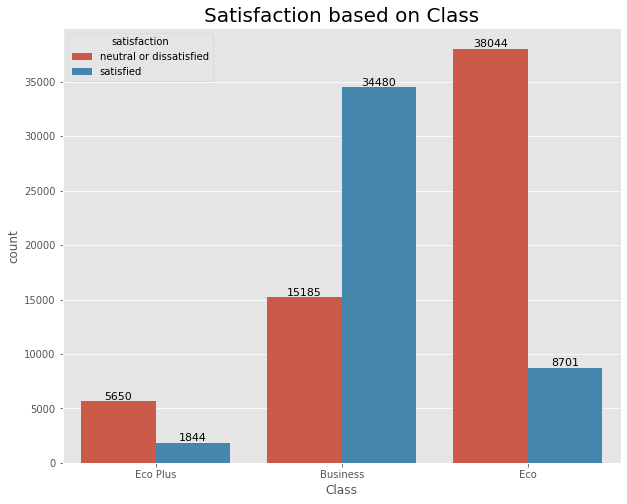

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x='Class',hue='satisfaction')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=11)
plt.title('Satisfaction based on Class', fontsize=20)
plt.show()

Dari tabel dan visualisasi dapat didapatkan informasi bahwa penumpang kelas bisnis lebih banyak merasa puas (69%) dibanding merasa netral atau tidak puas (31%). Sedangkan 25% penumpang kelas eco plus merasa puas dan 75% merasa netral atau tidak puas. Lalu untuk hanya 19% penumpang kelas eco yang merasa puas sedangkan sisanya (81%) merasa tidak puas. 

Rekomendasi :

***Oleh karena itu, segmentasi kelas pesawat yang perlu diprioritaskan untuk peningkatan adalah kelas eco karena pengguna kelas eco adalah pengguna terbanyak setelah kelas bisnis dan penumpang paling banyak merasa netral atau tidak puas. Kemudian maskapai juga mengacu/merefer kepada servis kelas bisnis yang dinilai memuaskan oleh penumpang dengan kembali lagi tetap memperhatikan dan menghitung cost yang dibutuhkan***

## 4. **Bagaimana hubungan tipe penumpang dengan tingkat kepuasan penumpang?**

Hal ini bisa membantu perusahaan untuk menentukan kepada siapa strategi yang tepat perlu diterapkan agar dapat menaikan kepuasan penumpang.


In [ ]:
pd.crosstab(df['Customer Type'], df['satisfaction'])

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,44390,40533
disloyal Customer,14489,4492


In [ ]:
pd.crosstab(df['Customer Type'], df['satisfaction'], normalize='index').round(2)*100

satisfaction,neutral or dissatisfied,satisfied
Customer Type,,
Loyal Customer,52.0,48.0
disloyal Customer,76.0,24.0


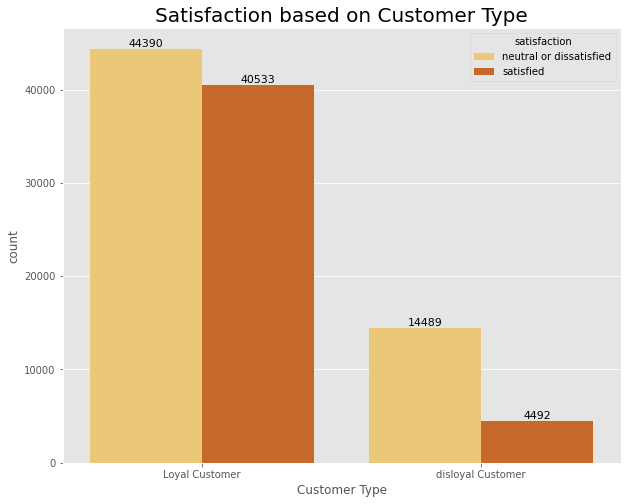

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x='Customer Type',hue='satisfaction', palette='YlOrBr')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=11)
plt.title('Satisfaction based on Customer Type', fontsize=20)
plt.show()

H0 : Tipe customer tidak berpengaruh terhadap kepuasan penumpang (independent)

Ha : Tipe customer berpengaruh terhadap kepuasan penumpang (dependent)

In [ ]:
# Menguji hipotesis apabila tipe customer mempengaruhi kepuasan penumpang dengan chi squared contingency
df_ct = pd.crosstab(df['Customer Type'],df['satisfaction'])
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Customer Type dependent terhadap Satisfaction(Tolak Ho)')
else:
    print('Customer Type independent terhadap Satisfaction(Terima Ho')

Customer Type dependent terhadap Satisfaction(Tolak Ho)


Dari data diatas, dapat dilihat bahwa Loyal Customer dan Disloyal Customer, keduanya memeiliki kecenderungan menilai pelayanan berupa netral atau tidak puas. Proporsi Disloyal customer yang memilih netral atau tidak puas cukup besar yaitu 76%. Sedangkan proporsi Loyal customer sebanyak 52%. Loyal Customer lebih banyak dibanding disloyal customer, hal ini dapat jadi pertanda bahwa lebih banyak customer lama yang menggunakan pelayanan maskapai, dan sedikitnya customer baru. Hal ini menunjukkan kualitas pelayanan perlu direview karena tidak berbanding lurus dengan ekspektasi dari pengguna baru atau penguna yang pertama kali menggunakan maskapai ini (disloyal customer). Dari hasil pengujian statistik dapat dipahami bahwa tipe customer mempengaruhi kepuasan penumpang. 

Rekomendasi: 

Dapat dipahami bahwa perusahaan juga harus memperbaiki pelayanan dan mencari strategi marketing baru agar customer baru datang dan disloyal customer dapat convert menjadi loyal customer. Selain itu maskapai juga dapat mempertimbangkan pendekatan memberikan reward bagi disloyal customer untuk bisa kembali menggunakan maskapai tersebut, contoh menggunakan fitur Miles

## 5. **Bagaimana hubungan keterlambatan pesawat dengan tingkat kepuasan penumpang?**

Perusahaan ingin mengetahui bagaimana pengaruh keterlambatan pesawat dengan tingkat kepuasan penumpang.

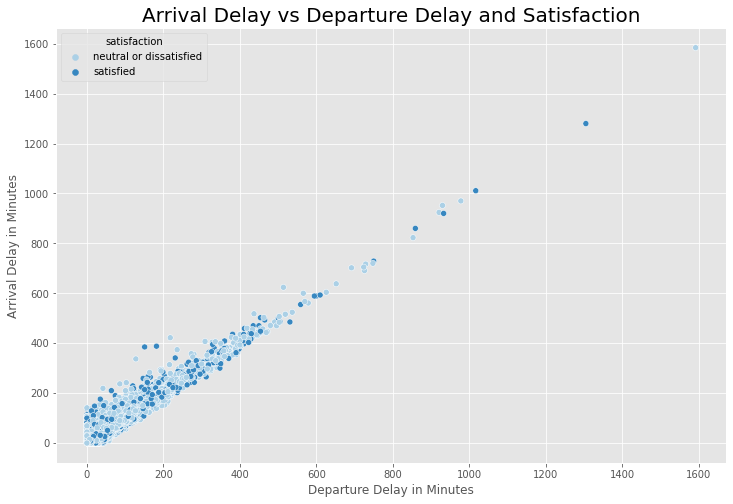

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes',data=df,hue='satisfaction',palette='Blues')
plt.title('Arrival Delay vs Departure Delay and Satisfaction', fontsize=20)
plt.show()

Berdasarkan scatterplot di atas, waktu Keterlambatan pesawat saat kedatangan maupun keberangkatan cenderung tidak memiliki hubungan yang signifikan dengan tingkat kepuasan pelanggan. Sedangkan waktu keterlambatan kedatangan dan waktu keterlambatan keberangkatan memiliki hubungan yang cenderung linier, secara logika cukup sesuai, yaitu apabila terjadi keterlambatan saat keberangkatan maka kemungkinan besar akan terjadi keterlambatan juga saat kedatangan

Pada scatterplot di atas terdapat penumpang yang mengalami keterlambatan lebih dari 800 menit namun penumpang tersebut merasa puas dengan pelayanan maskapai ini. Sebaliknya penumpang dengan keterlambatan di bawah 200 menit merasa netral atau tidak puas. Sehingga keterlambatan tidak memiliki hubungan yang signifikan terhadap kepuasan pelanggan

Rekomendasi :

Walaupun tidak ada hubungan antara waktu keterlambatan dengan kepuasan pelanggan, namun maskapai penerbangan tetap harus memberikan kompensasi pada penumpang jika melewati menit tertentu.


# Summary

1. **Bagaimana kondisi kepuasan pelanggan ?** 

- Sebanyak 58.879 dari 103.904 penumpang (56,67% penumpang) merasa netral atau tidak puas terhadap pelayanan yang diberikan oleh maskapai penerbangan.
- Penumpang yang merasa netral or disatisfied memiliki kecenderungan lebih banyak pada rentang umur sekitar 20-40 tahun, sedangkan penumpang yang merasa puas terhadap pelayanan yang diberikan memiliki kecenderungan lebih banyak berada pada rentang umur 40-60 tahun.

2. **Faktor apa yang paling berpengaruh terhadap kepuasan dan ketidakpuasan penumpang secara keseluruhan?**

- Dari 14 faktor yang berpengaruh terhadap kepuasan yang disurvei oleh maskapai, terdapat 3 faktor dengan penilaian pelayanan terbaik (secara berurutan dari yang terbaik), yaitu Inflight service, Baggage Handling, dan Seat comfort. Selanjutnya terdapat 3 faktor dengan penilaian pelayanan terburuk (secara berurutan dari yang terburuk), yaitu Inflight wifi service, Ease of Online booking, Gate location. 

- Maskapai perlu lebih memerhatikan 3 faktor dengan penilaian pelayan terburuk untuk bisa diperbaiki pelayanannya guna meningkatkan kepuasan penumpang. 
Rekomendasi:

  - Inflight wifi service : faktor ini dapat diperbaiki dengan meningkatkan kualitas wifi yang disediakan oleh maskapai.

  - Ease of Online booking : faktor ini dapat diperbaiki dengan membuat aplikasi dengan fitur yang lebih mengikuti jaman atau up-to-date. Atau jika memang sudah ada aplikasi online booking maka perlu dikembangkan aplikasinya sehingga lebih mudah dimengerti dan memudahkan penumpang dalam online booking maupun online boarding (lebih user friendly).

  - Gate location : faktor lokasi gate dapat diadjust agar tidak terlalu jauh dari pesawat sehingga tidak memerlukan waktu dan tenaga yang lebih banyak untuk mobilisasi dari gate ke pesawat. Menambahkan fasilitas shuttle bus untuk lokasi gate dan pesawat yang jauh juga dapat menjadi opsi.

3. **Kelas penumpang apa yang paling banyak merasa tidak puas (selain satisfied)?**

- Kelas penumpang eco merupakan kelas yang paling banyak merasa tidak puas sebanyak 81% penumpang kelas eco merasa tidak puas.

- Rekomendasi: 
Segmentasi kelas pesawat yang perlu diprioritaskan untuk peningkatan adalah kelas eco karena pengguna kelas eco adalah pengguna terbanyak setelah kelas bisnis dan penumpang paling banyak merasa netral atau tidak puas, agar dampak yang diberikan bisa berpeluang lebih banyak untuk memperbaiki kepuasan pelanggan.

4. **Bagaimana hubungan tipe penumpang dengan tingkat kepuasan penumpang?**

- Dapat dilihat bahwa Loyal Customer dan Disloyal Customer, keduanya memeiliki kecenderungan menilai pelayanan berupa netral atau tidak puas. Proporsi Disloyal Customer yang memilih netral atau tidak puas cukup besar yaitu 76%. Sedangkan proporsi Loyal customer sebanyak yang merasa netral atau tidak puas adalah 52%. Dari hasil pengujian statistik dapat dipahami bahwa tipe customer mempengaruhi kepuasan penumpang. 

- Rekomendasi:
Dapat dipahami bahwa perusahaan juga harus memperbaiki pelayanan dan mencari strategi marketing baru agar customer baru datang dan disloyal customer dapat convert menjadi loyal customer. Selain itu maskapai juga dapat mempertimbangkan pendekatan memberikan reward bagi disloyal customer untuk bisa kembali menggunakan maskapai tersebut, contoh menggunakan fitur Miles.


5. **Bagaimana hubungan keterlambatan pesawat dengan tingkat kepuasan penumpang?**

- Waktu Keterlambatan pesawat saat kedatangan maupun keberangkatan cenderung tidak memiliki hubungan yang signifikan dengan tingkat kepuasan pelanggan.

- Rekomendasi :
Walaupun tidak ada hubungan antara waktu keterlambatan dengan kepuasan pelanggan, namun maskapai penerbangan tetap harus memberikan kompensasi pada penumpang jika melewati menit tertentu.

